<img align="right" width="200" height="200" src="https://static.wikia.nocookie.net/lego/images/2/23/PPG_logo.png"> 

# EDA Assignment #4 - Python 
 


## By: Wejdan Al-Ahmadi

<hr style="border:2px solid gray"> </hr>

### Objective:

#### Use what you have learned about Matplotlib and Seaborn to create at least 4 of the following plots:

* Line Chart
* Bar Chart
* Scatter Plot
* Pie Chart
* Histogram
* Boxplot
* Subplot with 4 of your favorite plots made previously in the assignment

#### All plots should have the following:

* Title
* Axis Labels
* Appropriate figure size

In [265]:
# Imports
import pandas as pd
import requests
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Note: We can set the style by calling Seaborn's set() method 
sns.set(rc={'figure.figsize':(20,8.27)})

#### Dataset: Video Game Sales Data
##### 1- Import data
The first step is to import the data. 

In [2]:
VG_sales = pd.read_csv('./data/vgsales.csv')
VG_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


##### 2- Check data
Next we check the data and make sure there arent too many null values. 

In [365]:
# first check the shape, this dataset has 16598 rows and 11 columns
VG_sales.shape

(16598, 11)

In [3]:
VG_sales.info()
# from the results we can see that year and publisher have possible null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
VG_sales.isnull().sum()
# this confirms that there are 271 null values for the Year and 58 for the Publisher
# however compared to the number of records this much null values arent that significant so we shall proceed with our analysis

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

#### Plots: 
##### 1- Histogram Plots:
1.1) Number of games published each year plot:

Here are the **insights** I can see from the plot below: 
   - 2010 had the most games released and the Year. 
   - Count have an overall positive correlation where the count of games increase every year compared to the earlier years. 

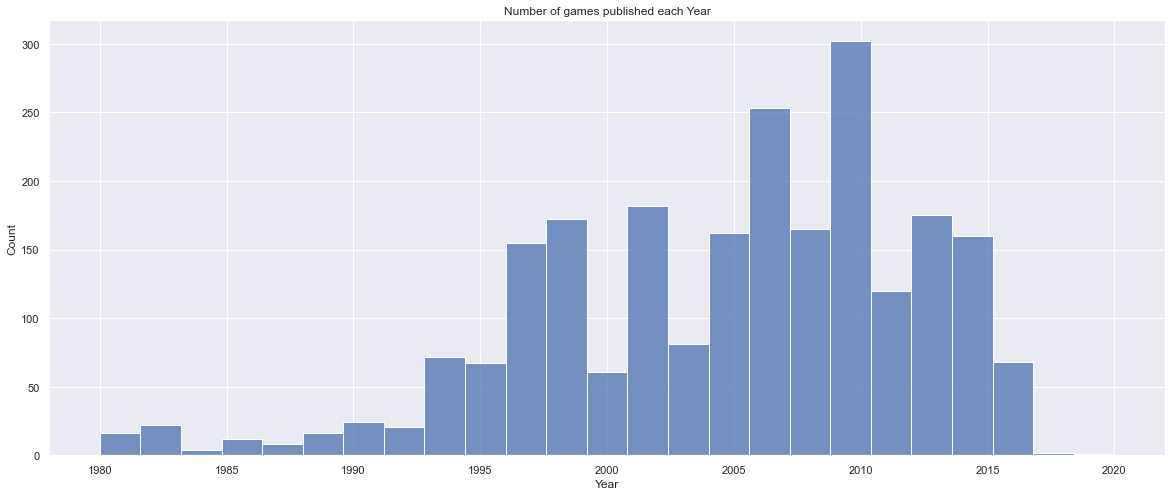

In [376]:
plt.figure(figsize=(20,8))
sns.histplot(pub_year['Year'])
plt.title("Number of games published each Year");

1.2) Publishers with the most released games plot:

**First we clean and filter the data a little bit to help make our plot more visually appealing and readable**

In [377]:
# Now we will get the names of the publishers who produce the most popular games

# 1-get the len of the Publisher,Year from the 

pub_year = VG_sales.groupby(['Publisher','Year']).Publisher.agg([len])
pub_year=pub_year.sort_values(by='len',ascending=False) # sort by len in descending order
pub_year=pub_year.reset_index()                         # reset the index so 'Publisher' becomes a column
# pub_year # uncomment to view

In [378]:
# 2- get the publishers who have published more than 25 games
pub_year_top = pub_year[pub_year['len']>25]
# 3- get the names of those publishers
names = pub_year_top.Publisher.value_counts()
names_list =list(names.index)
#names_list # uncomment to view

In [379]:
# get a subset dataframe of the top publishers
top_publishers_df = VG_sales[VG_sales['Publisher'].isin(names_list)]

# rename the publishers to make it easier to read

Abbreviated_names = {"Sony Computer Entertainment":"Sony",
                     "Namco Bandai Games":"Namco Bandai",
                     "Konami Digital Entertainment":"Konami",
                     "Electronic Arts":"EA", 
                     "Take-Two Interactive":"Take-Two",
                    "Disney Interactive Studios":"Disney",
                    "Vivendi Games":"Vivendi",
                    "Zoo Digital Publishing":"Zoo Digital",
                    "Warner Bros. Interactive Entertainment":"Warner Bros.",
                    "Acclaim Entertainment":"Acclaim",
                    "Midway Games":"Midway",
                    "Microsoft Game Studios":"Microsoft",
                    "Eidos Interactive":"Eidos"}

top_publishers_df['Publisher']=top_publishers_df['Publisher'].replace(Abbreviated_names)

# sort alphabetically
top_publishers_df=top_publishers_df.sort_values(["Publisher"])

#top_publishers_df # uncomment to view

<ipython-input-379-2f0037052cf0>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_publishers_df['Publisher']=top_publishers_df['Publisher'].replace(Abbreviated_names)



Here are the **insights** I can see from the plot below: 
   - EA dominates the market and produces the most games, followed by Activision and Ubisoft, which makes sense since they are AAA game companies.  
   - Only 9 out of a total of 26 companies managed to release more than 400 games. 
   - The companies with the most games released are all triple-A game companies. 

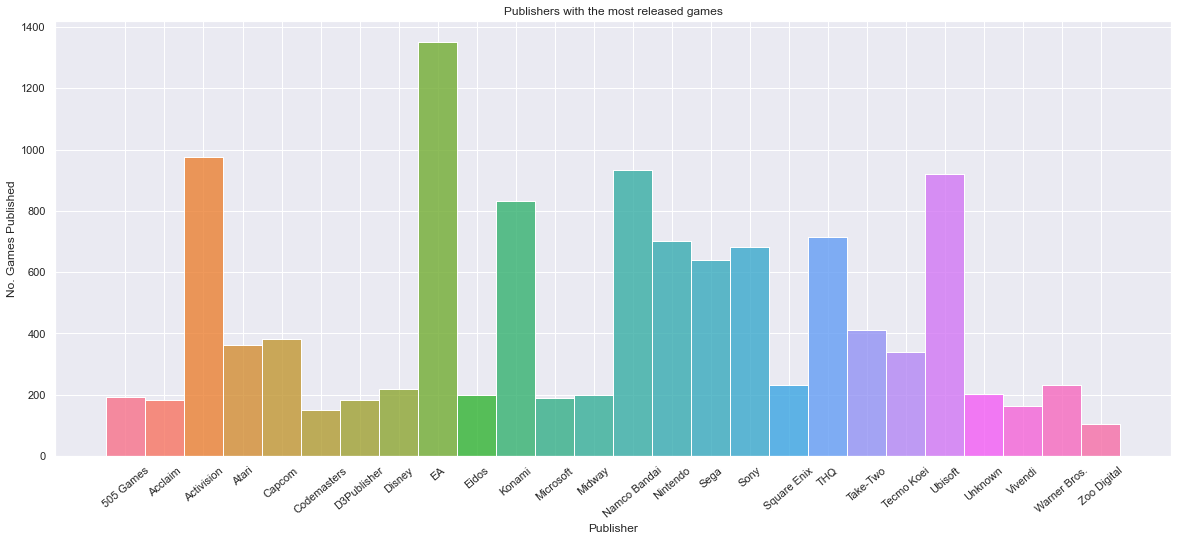

In [374]:
plt.figure(figsize=(20,8))
sns.histplot(
    top_publishers_df,
    x="Publisher",
    hue="Publisher",
    multiple="stack",
    alpha=0.8,
    legend=False
)
plt.ylabel("No. Games Published")
plt.xticks(rotation=40)
plt.title("Publishers with the most released games");


##### 2- Line Plot
This plot below demonstrates all the sales for the top 100 games, the insights I can derive from this plot are: 
* The lower the number in rank (which means the highest ranking) the more money it generates. 
* After the global market the strongest game market is the NA region. 
* There is a spike in sales in the middle of rank 1 to 20 an interesting observation to make here is that lets say a game whose ranked 10 made more money than a higher ranking game. Therefore the higher Rank doesnt guarentee more money. 

In [291]:
# get the sales information along with ranks
sales_df = VG_sales[['Rank','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
# get the top 100 ranked games
sales_df=sales_df[sales_df["Rank"]<=100]

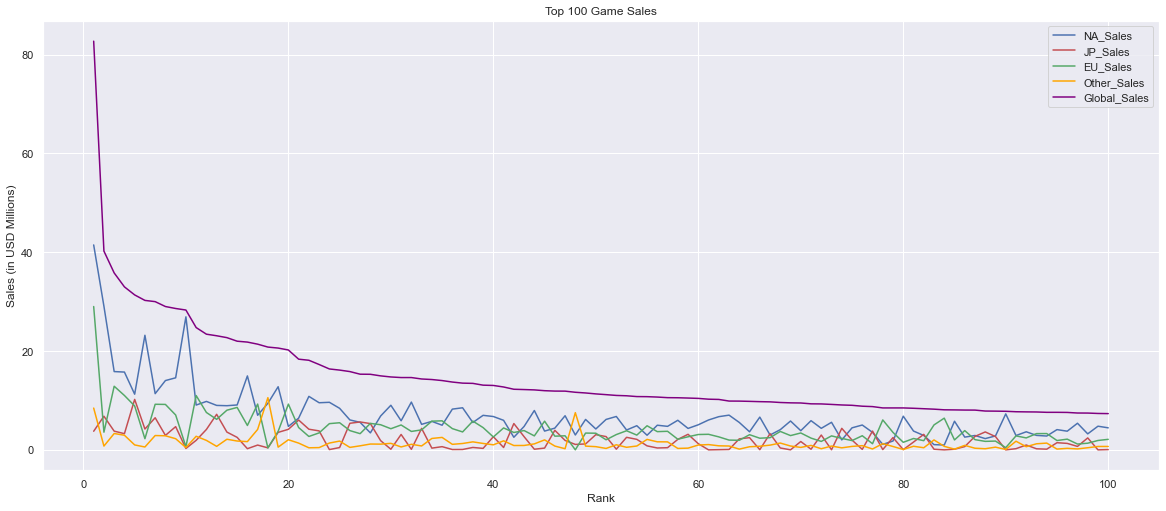

In [392]:
# plot each region sales with the rank
ax = sales_df.plot(kind="line", x="Rank",y="NA_Sales", color="b", label="NA_Sales")
sales_df.plot(x="Rank",y="JP_Sales", color="r", label="JP_Sales", ax=ax)
sales_df.plot( x="Rank",y="EU_Sales", color="g", label="EU_Sales", ax=ax)
sales_df.plot( x="Rank",y="Other_Sales", color="orange", label="Other_Sales", ax=ax)
sales_df.plot( x="Rank",y="Global_Sales", color="purple", label="Global_Sales", ax=ax)

ax.set_xlabel("Rank")
ax.set_ylabel("Sales (in USD Millions)")
ax.set_title("Top 100 Game Sales")
plt.show()

##### 3- Scatter Plot: 
This plot demonstrates which genres had the highest sales in the global market, the insights that I can derive from this plot are: 
* Sports games are the most popular and most money making genre. 
* Platform and Roleplaying games sold the most copies but that doesnt mean they made the most money. 

<Figure size 1440x576 with 0 Axes>

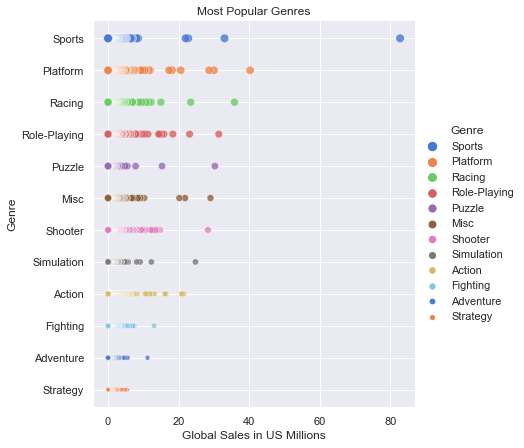

In [389]:
# plot the genre against the global sales
plt.figure(figsize=(20,8))
line_plot=sns.relplot(
    x="Global_Sales", 
    y="Genre", 
    hue="Genre",
    size="Genre",
    alpha=.8, 
    palette="muted",
    height=6, 
    data=VG_sales
)
line_plot.set_axis_labels("Global Sales in US Millions", "Genre")
plt.title("Most Popular Genres");

##### 4- Box Plot: 
This plot demonstrates which platforms had the highest ranking games, the insights that I can derive from this plot are: 
* Most of the platforms cover the range of ranked games from the highest to the lowest, this shows that the rank of the game is not tied to a specific gaming platform, and that makes sense since companies release their games across multiple platforms. 
* NES has the most outliers. 


In [359]:
# to make the y label start from rank 1 since there is no rank 0
tick_list = [1,2500,5000,7500,10000,12500,15000]

[15000, 12500, 10000, 7500, 5000, 2500, 1]

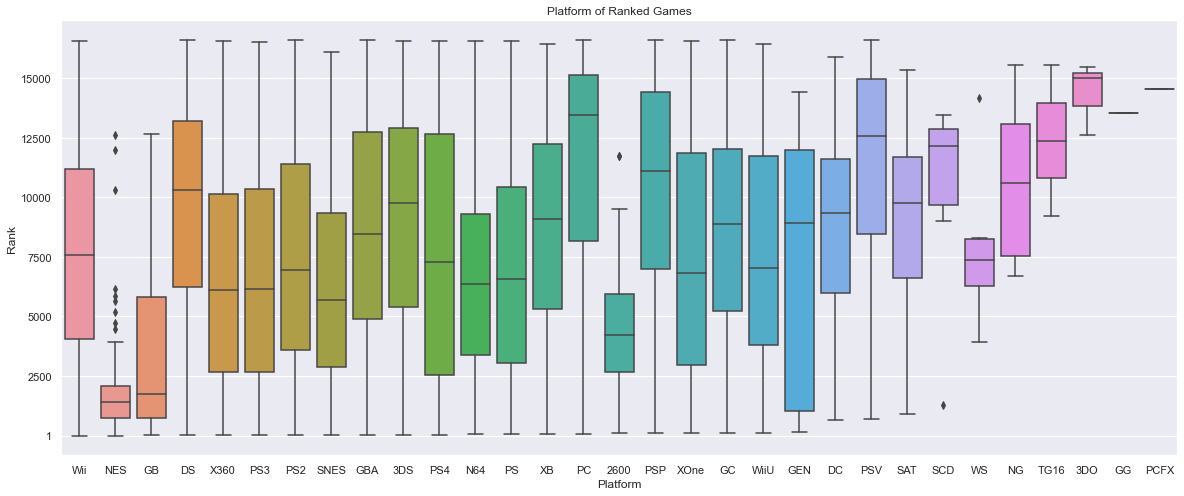

In [388]:
# plot the Platform against the rank
plt.figure(figsize=(20,8))

b1 = sns.boxplot(
    x="Platform", 
    y="Rank",
    
    data=VG_sales
)
b1.set_yticks(tick_list)
plt.title("Platform of Ranked Games");